Transpose convolutions, also known as deconvolutions or upsample convolutions, are a type of convolution operation that reverses the forward pass of a convolution. Instead of mapping multiple input pixels to a single output pixel, they map a single input pixel to multiple outputs. This operation is often used in neural networks for tasks that require upsampling, such as in generating higher-resolution images from lower-resolution inputs or for semantic segmentation tasks where the goal is to produce pixel-wise labels that are the same size as the input image.

Here's how transpose convolutions work:

1. **Upsampling**: Unlike a regular convolution that reduces the size of the input with its operation, a transpose convolution takes a smaller input and increases its dimensions. This is achieved by inserting zeros between the pixels of the input data (a process known as upsample or stride), effectively increasing the resolution.

2. **Convolution**: After upsampling, a regular convolution operation is applied, but since the input now has zeros inserted, the output is larger than the original input.

3. **Learnable Parameters**: The weights in a transpose convolution are learned in the same way as a regular convolution during the training process. This allows the network to learn how to best upsample the input data.

4. **Output Size**: The size of the output is determined by the stride and padding used during the transpose convolution operation. For example, with a stride of 2 and no padding, an input of size 7x7 could be upsampled to 14x14.

Transpose convolutions are widely used in generative models (like GANs) and autoencoders where you need to generate full-resolution data from a compressed representation. They are also a critical part of models like the U-Net architecture for image segmentation, where the network needs to produce output that matches the input's resolution.

The term "deconvolution" is sometimes considered a misnomer because it suggests an inversion of the convolution process, which isn't strictly accurate. It's more appropriate to think of transpose convolutions as a way to learn an upsampling operation that is suitable for the task at hand, rather than the direct mathematical inverse of a convolution.

In [283]:
import torch
import torch.nn as nn

import cv2
import numpy as np

from pathlib import Path
import matplotlib.pyplot as plt

In [284]:
class UpSampleCNN(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, scale_factor=1):
        super(UpSampleCNN, self).__init__()
        # Directly using ConvTranspose2d for upsampling
        self.upsample = nn.ConvTranspose2d(in_channels, out_channels, 
                                           kernel_size=2*scale_factor, 
                                           stride=scale_factor, 
                                           padding=scale_factor//2, bias=False)
    def forward(self, x):
        x = self.upsample(x)
        return x


In [285]:
model = UpSampleCNN(3, 3, 2)

(256, 256, 3)


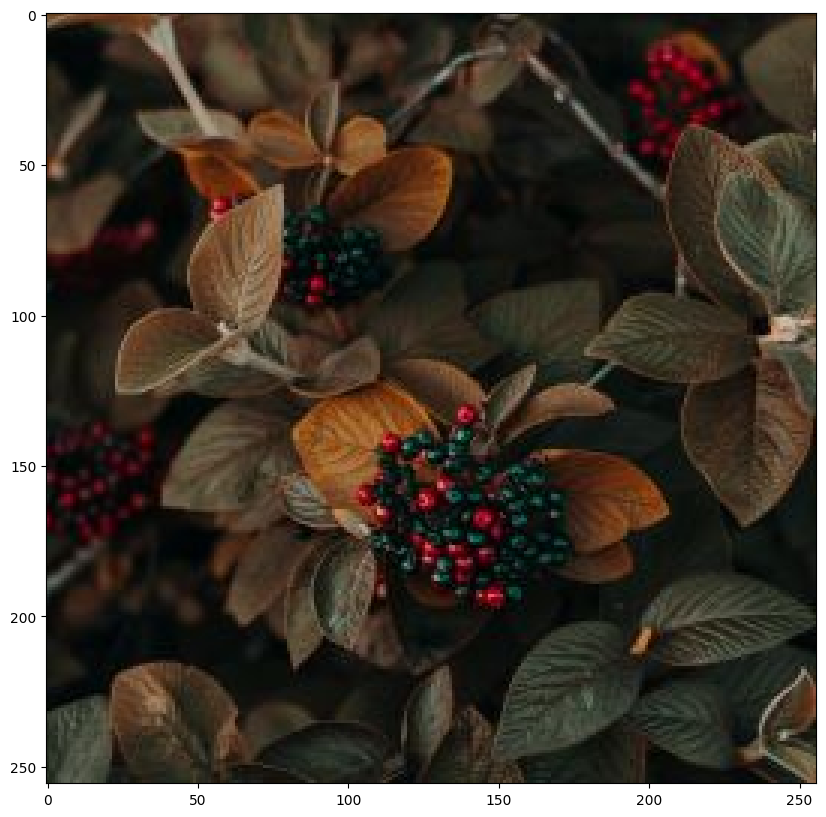

In [286]:
img_path = Path('/home/onkar/DATASET/images/256x256_img.jpg')
bgr_img = cv2.imread(str(img_path))

# Convert the image from BGR to RGB format
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

print(rgb_img.shape)

# Display the image
plt.figure(figsize=(10, 10)) # You can adjust the figure size as needed
plt.imshow(rgb_img)
# plt.axis('off') # Hide the axis
plt.show()

In [287]:
rgb_img = rgb_img/255.0
img_tensor = torch.tensor(rgb_img, dtype=torch.float32).unsqueeze(0) # input tensor with shape [1, 64, 64, 3]
img_tensor = img_tensor.permute(0, 3, 1, 2) # Change from [B, H, W, C] to [B, C, H, W]

print(img_tensor.shape)

torch.Size([1, 3, 256, 256])


In [288]:
model = UpSampleCNN(scale_factor=2)
model.eval()
print(model)

out_tensor = model(image_tensor)
print(out_tensor.shape)

UpSampleCNN(
  (upsample): ConvTranspose2d(3, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)
torch.Size([1, 3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


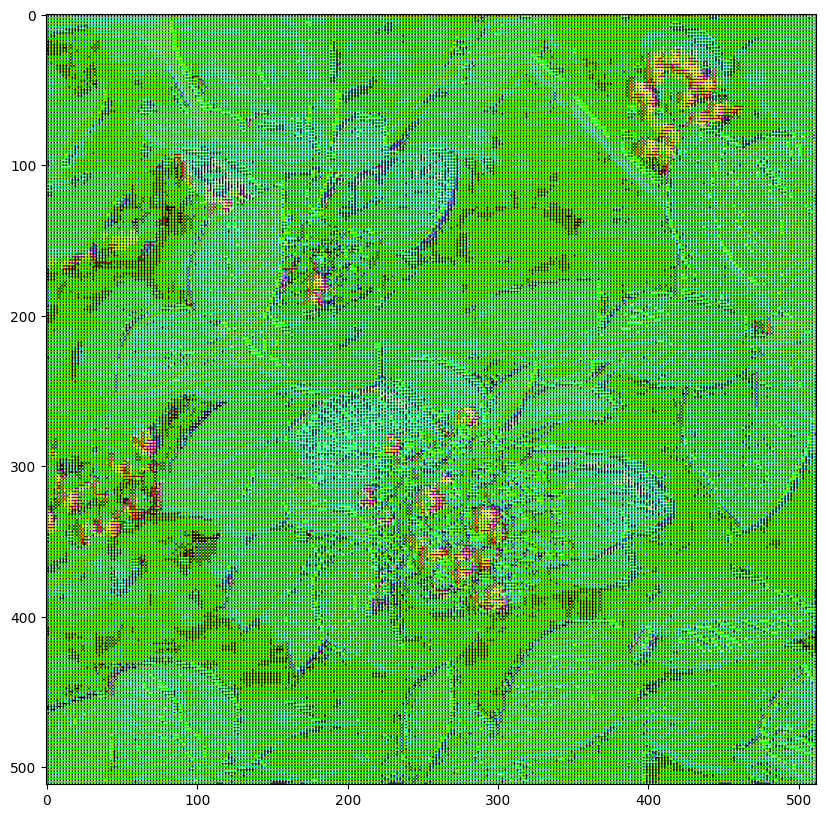

In [289]:
out_img = out_tensor.squeeze(0).permute(1, 2, 0).detach().numpy()
print(out_img.shape)
out_img = (out_img * 255).astype(np.uint64)

# Display the image
plt.figure(figsize=(10, 10)) # You can adjust the figure size as needed
plt.imshow(out_img)
# plt.axis('off') # Hide the axis
plt.show()